### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for outliers detection
from scipy import stats

from sklearn.model_selection import train_test_split

# for normalization/standardization of numeric features
from sklearn.preprocessing import MinMaxScaler

#model validation
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    classification_report
)
from sklearn.datasets import make_classification

# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB


####  Dataset description
This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

Target variable
12. target: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.

### Load Dataset

In [2]:
df = pd.read_csv(r"D:\Heart Attack prediction\heart_disease.csv") 

In [3]:
df.head()

,age,sex,chest pain type,resting bp,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail() #bottom 5 rows

,age,sex,chest pain type,resting bp,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


### Info of Dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp           1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


#### Data Cleaning & Preprocessing

In [6]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [7]:
# converting features to categorical features 

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'



df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'



df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')

In [8]:
df['sex'].value_counts()

male      909
female    281
Name: sex, dtype: int64

In [9]:
df['chest_pain_type'].value_counts()


asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [10]:
df['rest_ecg'].value_counts()


normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [11]:
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [12]:
df.drop (df[df.st_slope==0].index, inplace= True)

In [13]:
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [14]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [15]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_bp                 0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

### Exploratory Data Analysis (EDA)

In [16]:
df.shape

(1189, 12)

#### statistics of columns

In [17]:
df.describe()

,age,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [18]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 28
Max Age : 77
Mean Age : 53.70815811606392


#### Distribution of heart disease(target Variable)

###checking for balanced dataset

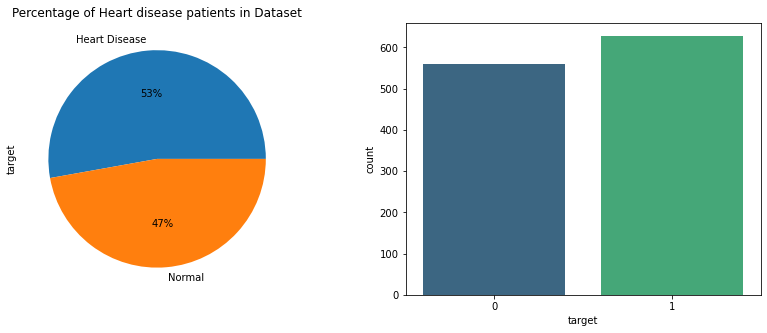

In [19]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
ax1 = df['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%", labels=["Heart Disease","Normal"]);
                                        
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

plt.subplot(1,2,2)
sns.countplot(x='target',data=df, palette='viridis')
plt.show()



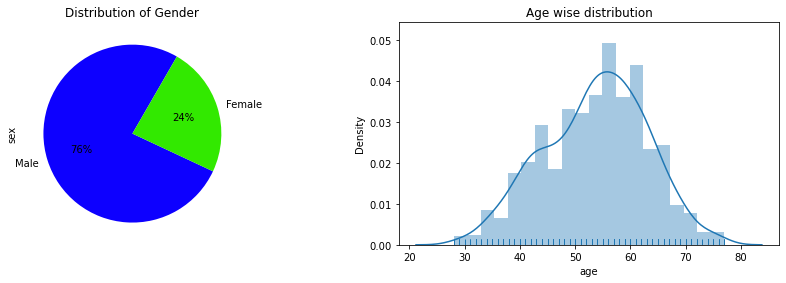

In [20]:
plt.figure(figsize=(15,9))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"])
plt.title("Distribution of Gender")
plt.subplot(222)
x= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")                                

plt.show()

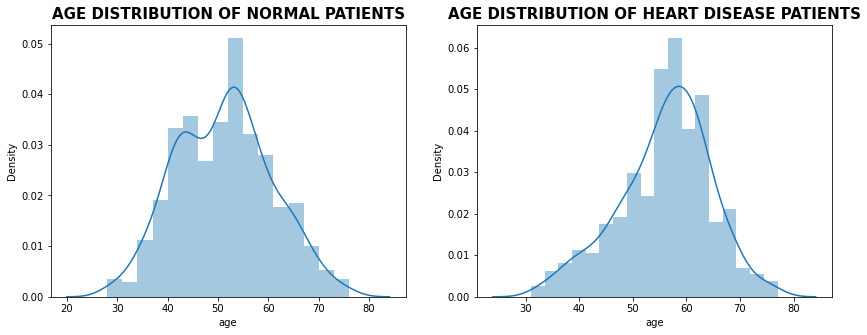

In [21]:
attr_1=df[df['target']==1]

attr_0=df[df['target']==0]

#### plotting age distribution of normal and heart patients

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')


plt.subplot(1,2,2)
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

plt.show()




#### plotting sex distribution of normal and heart patients

Text(0.5, 1.0, 'GENDER DISTRIBUTION  v/s Target\n')

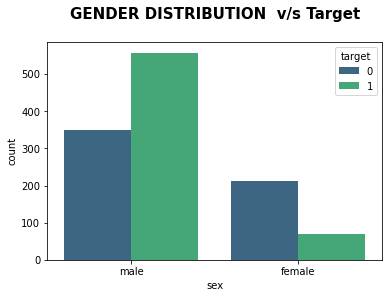

In [22]:
#### plotting sex distribution of normal and heart patients

sns.countplot(data= df, x='sex',hue='target',palette='viridis')
plt.title('GENDER DISTRIBUTION  v/s Target\n', fontsize=15, weight='bold')


#### Distribution of Chest Pain Type

<AxesSubplot:xlabel='sex', ylabel='count'>

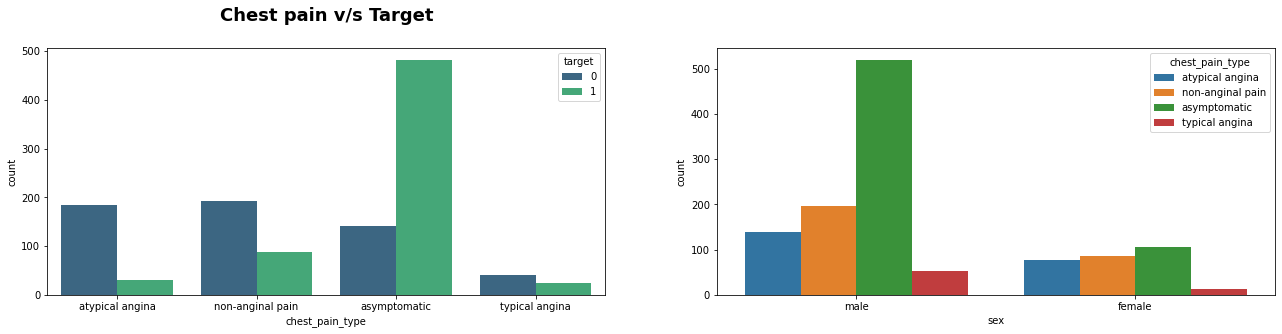

In [23]:
plt.figure(figsize=(22,10))
plt.subplot(221)
sns.countplot(df['chest_pain_type'],hue= df['target'], palette='viridis')
plt.title('Chest pain v/s Target\n', fontsize=18, weight='bold')
plt.subplot(222)
sns.countplot(df['sex'],hue=df["chest_pain_type"])


In [24]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


#### Distribution of Rest ECG

<AxesSubplot:xlabel='sex', ylabel='count'>

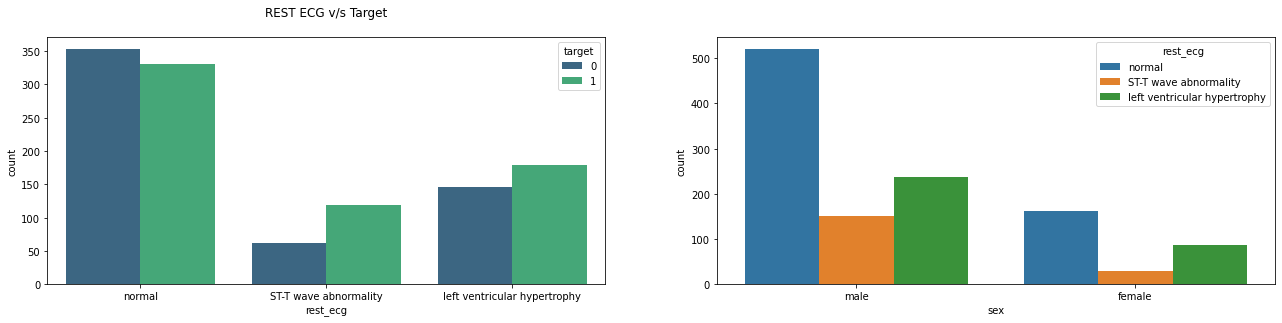

In [25]:
# plotting Rest ECG
plt.figure(figsize=(22,10))
plt.subplot(221)
sns.countplot(df['rest_ecg'],hue= df['target'], palette='viridis')
plt.title('REST ECG v/s Target\n')
plt.subplot(222)
sns.countplot(df['sex'],hue=df["rest_ecg"])


In [26]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


### Distribution of ST_Slope

<AxesSubplot:xlabel='sex', ylabel='count'>

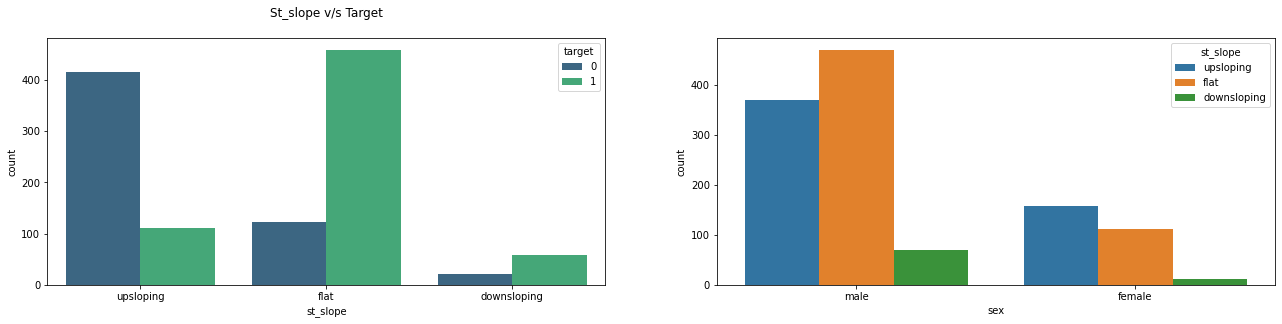

In [27]:

# plotting ST_Slope
plt.figure(figsize=(22,10))
plt.subplot(221)
sns.countplot(df['st_slope'],hue= df['target'], palette='viridis')
plt.title('St_slope v/s Target\n')
plt.subplot(222)
sns.countplot(df['sex'],hue=df["st_slope"])


In [28]:
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


<AxesSubplot:xlabel='rest_ecg', ylabel='count'>

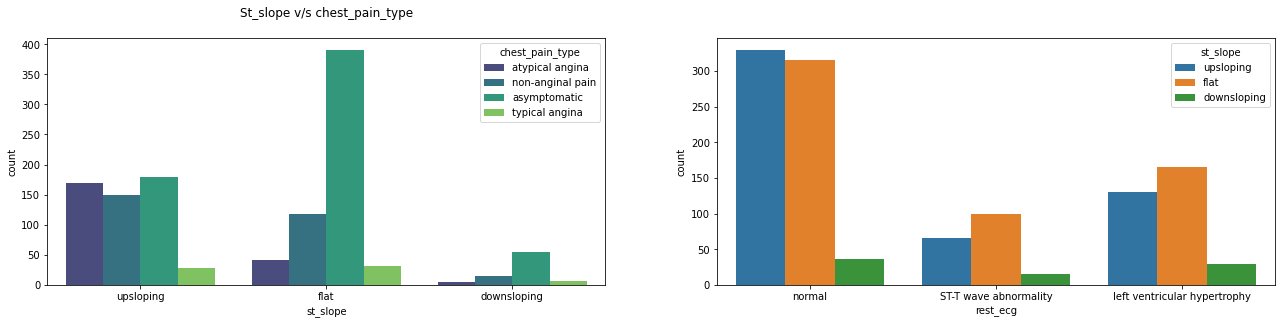

In [29]:
plt.figure(figsize=(22,10))
plt.subplot(221)
sns.countplot(df['st_slope'],hue= df['chest_pain_type'], palette='viridis')
plt.title('St_slope v/s chest_pain_type\n')
plt.subplot(222)
sns.countplot(df['rest_ecg'],hue=df["st_slope"])

### Distribution of Numerical features

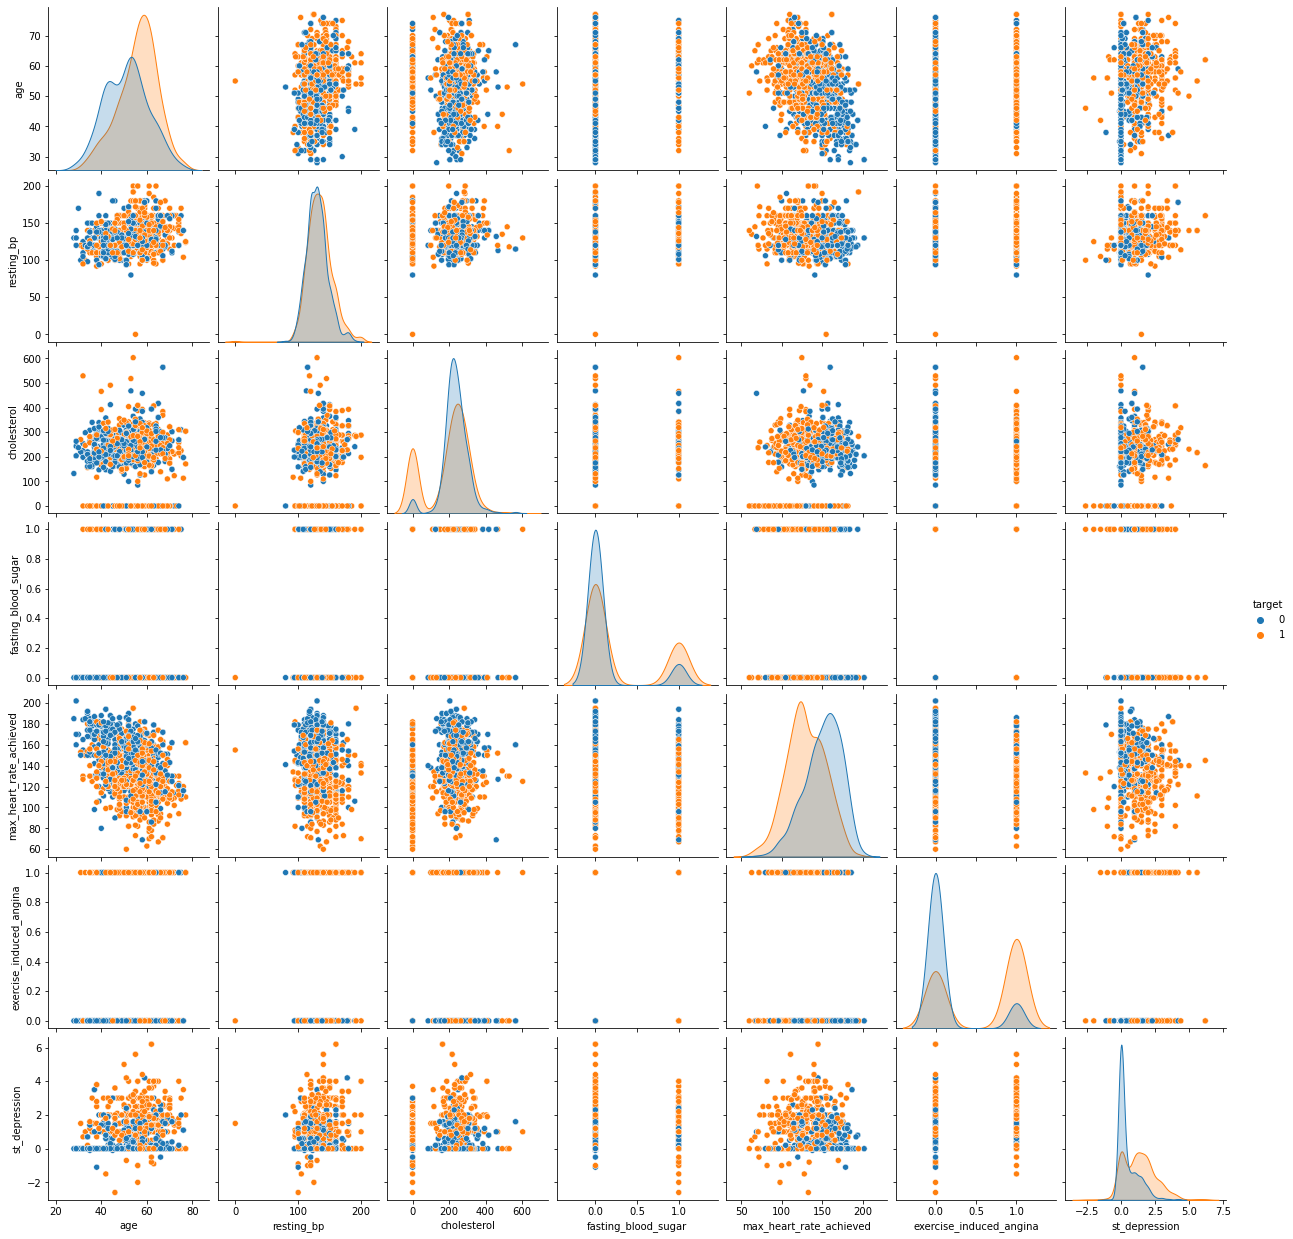

In [30]:

sns.pairplot(df,hue = 'target')

<AxesSubplot:xlabel='resting_bp', ylabel='cholesterol'>

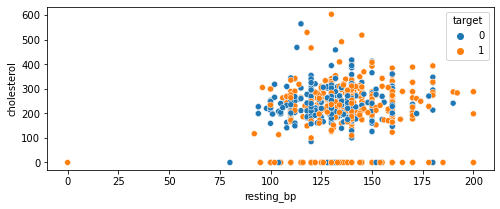

In [31]:
plt.figure(figsize=(8,3))
sns.scatterplot(x = 'resting_bp', y = 'cholesterol', hue = 'target', data = df)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='cholesterol'>

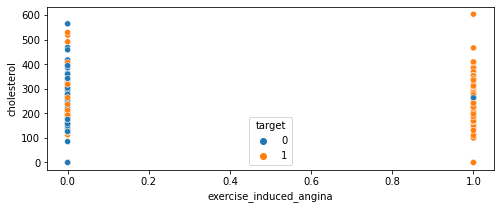

In [32]:
plt.figure(figsize=(8,3))
sns.scatterplot(x = 'exercise_induced_angina', y = 'cholesterol', hue = 'target', data = df)

<AxesSubplot:xlabel='st_depression', ylabel='cholesterol'>

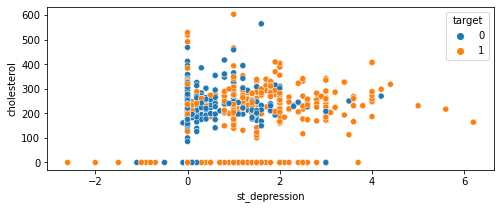

In [33]:
plt.figure(figsize=(8,3))
sns.scatterplot(x = 'st_depression', y = 'cholesterol', hue = 'target', data = df)

#### Outlier Detection and Removal

In [34]:
# Detecting outliers using Z score

df_numeric = df[['age', 'resting_bp', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']]


In [35]:
df_numeric.head()

,age,resting_bp,cholesterol,max_heart_rate_achieved,st_depression
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [36]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(df_numeric))
print(z)

           age  resting_bp  cholesterol  max_heart_rate_achieved  \
0     1.466266    0.428136     0.775228                 1.264301   
1     0.503599    1.517370     0.299516                 0.637259   
2     1.787155    0.116481     0.716067                 1.635766   
3     0.610562    0.319212     0.035725                 1.243865   
4     0.031216    0.972753     0.151616                 0.695204   
...        ...         ...          ...                      ...   
1185  0.931451    1.205715     0.528727                 0.303303   
1186  1.528698    0.645983     0.171336                 0.049408   
1187  0.352105    0.116481     0.782658                 0.969535   
1188  0.352105    0.116481     0.252646                 1.342681   
1189  1.680192    0.319212     0.348816                 1.303491   

      st_depression  
0          0.850408  
1          0.070396  
2          0.850408  
3          0.530798  
4          0.850408  
...             ...  
1185       0.254557  
1186   

In [37]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  167,  242,  325,  366,  371,  391,  400,
        450,  592,  617,  703,  733,  760,  772,  792,  851,  977, 1009,
       1012, 1038, 1069, 1074, 1077, 1171], dtype=int64), array([2, 2, 1, 2, 4, 1, 4, 1, 3, 3, 1, 1, 1, 2, 4, 1, 1, 4, 4, 4, 4, 4,
       1, 2, 4, 1, 4, 4], dtype=int64))


In [38]:
#filtering outliers retaining only those data points which are below threshhold
df = df[(z < 3).all(axis=1)]

In [39]:
# checking shape of dataset after outlier removal
df.shape

(1161, 12)

In [40]:
## encoding categorical variables
df = pd.get_dummies(df, drop_first=True)



In [41]:
df.head()

,age,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [42]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['target'],axis=1)
y = df['target']



In [43]:
X.head()

,age,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,1,0,1,0,0,1,0,1


<AxesSubplot:>

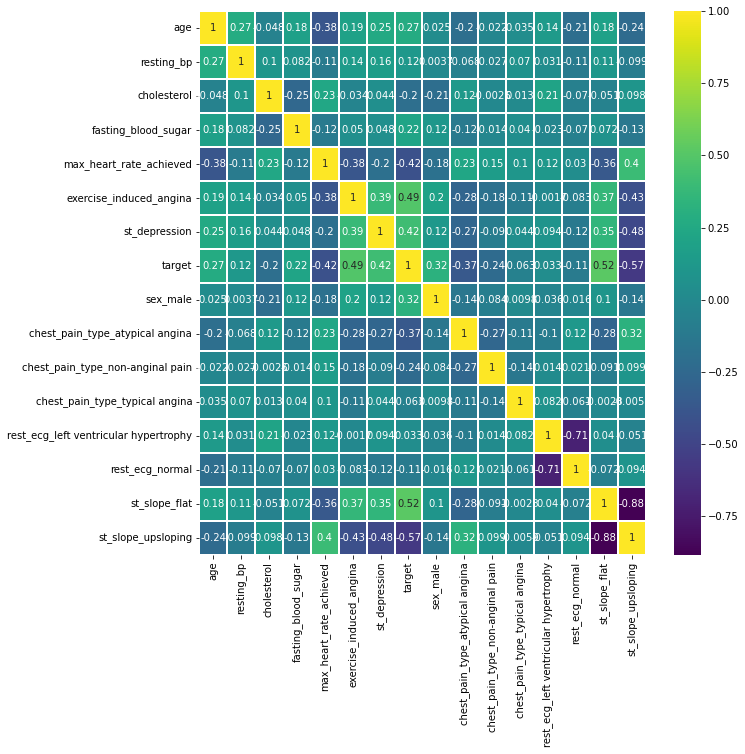

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,  linewidth=0.3,cmap='viridis')

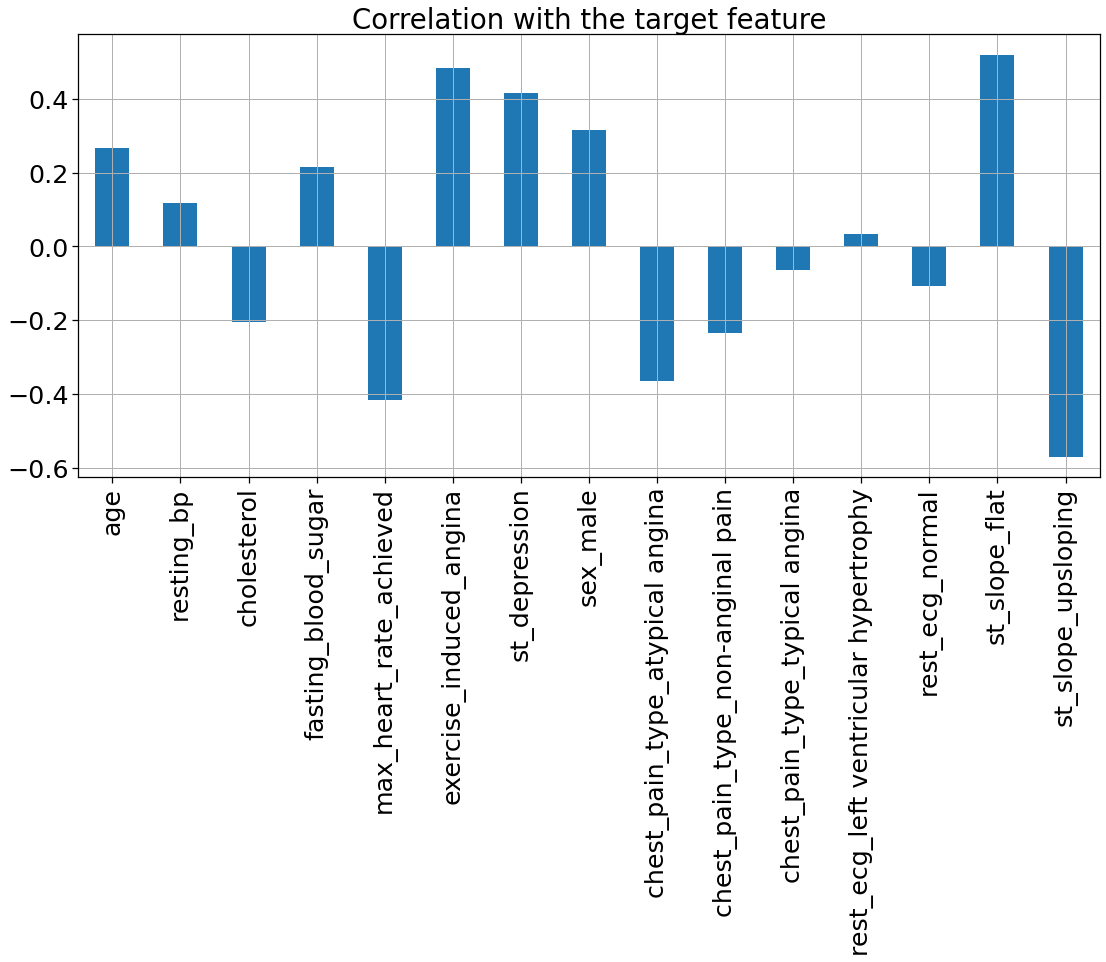

In [45]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(16, 14), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

#### Train Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, shuffle=True, random_state=5)

In [47]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    423
0    389
Name: target, dtype: int64
Distribution of traget variable in test set
1    182
0    167
Name: target, dtype: int64


In [48]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(812, 15)
(812,)
------------Test Set------------------
(349, 15)
(349,)


#### Normalization/standardization of numeric features

In [49]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[0.57142857, 0.38709677, 0.47854077, ..., 0.        , 0.        ,
        0.        ],
       [0.65306122, 0.2688172 , 0.49356223, ..., 1.        , 0.        ,
        1.        ],
       [0.30612245, 0.43010753, 0.73175966, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.57142857, 0.62365591, 0.49356223, ..., 0.        , 1.        ,
        0.        ],
       [0.40816327, 0.30107527, 0.37982833, ..., 0.        , 0.        ,
        1.        ],
       [0.2244898 , 0.19354839, 0.39055794, ..., 0.        , 0.        ,
        1.        ]])

In [50]:
X_test[['age','resting_bp','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_test[['age','resting_bp','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
474,0.673913,0.61,0.643585,1,0.407407,1,0.549020,1,0,1,0,0,0,1,0
885,0.608696,0.60,0.391039,0,0.600000,0,0.294118,1,0,0,0,0,1,1,0
642,0.413043,0.50,0.560081,0,0.533333,0,0.254902,0,0,1,0,0,1,0,1
1114,0.826087,0.72,0.564155,0,0.777778,0,0.215686,0,0,1,0,0,1,0,1
51,0.391304,0.40,0.417515,0,0.229630,1,0.607843,0,0,0,0,0,1,1,0


#### StratifiedKFold cross validation

In [51]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

skfold1=StratifiedKFold(n_splits=5)
skfold2=StratifiedKFold(n_splits=10)

model=LogisticRegression()
scores1=cross_val_score(model,X,y,cv=skfold1)
scores2=cross_val_score(model,X,y,cv=skfold2)


In [52]:
scores1


array([0.86695279, 0.84482759, 0.87931034, 0.78017241, 0.77155172])

In [53]:
scores2

array([0.85470085, 0.92241379, 0.87068966, 0.79310345, 0.87931034,
       0.88793103, 0.79310345, 0.76724138, 0.77586207, 0.79310345])

In [54]:
print('Logistic Regression')
print('MIN1:',np.min(scores1), 'MEAN1:',np.mean(scores1), 'Max1:', np.max(scores1))
print('MIN2:',np.min(scores2), 'MEAN2:',np.mean(scores2), 'Max2:', np.max(scores2))

Logistic Regression
MIN1: 0.771551724137931 MEAN1: 0.8285629717330177 Max1: 0.8793103448275862
MIN2: 0.7672413793103449 MEAN2: 0.833745947539051 Max2: 0.9224137931034483


In [55]:
skfold1=StratifiedKFold(n_splits=5)
skfold2=StratifiedKFold(n_splits=10)

model=RandomForestClassifier(criterion='entropy',n_estimators=100)
scores3=cross_val_score(model,X,y,cv=skfold1)
scores4=cross_val_score(model,X,y,cv=skfold2)

In [56]:
scores3

array([0.88841202, 0.87931034, 0.96551724, 0.94827586, 0.97413793])

In [57]:
scores4

array([0.8974359 , 0.98275862, 0.86206897, 0.78448276, 0.93965517,
       0.97413793, 1.        , 0.94827586, 1.        , 0.94827586])

In [58]:
print('RandomForestClassifier')
print('MIN1:',np.min(scores3), 'MEAN1:',np.mean(scores3), 'Max1:', np.max(scores3))
print('MIN2:',np.min(scores4), 'MEAN2:',np.mean(scores4), 'Max2:', np.max(scores4))

RandomForestClassifier
MIN1: 0.8793103448275862 MEAN1: 0.9311306792955454 Max1: 0.9741379310344828
MIN2: 0.7844827586206896 MEAN2: 0.9337091069849691 Max2: 1.0


In [59]:
skfold5=StratifiedKFold(n_splits=5)
skfold6=StratifiedKFold(n_splits=10)

model=KNeighborsClassifier()
scores5=cross_val_score(model,X,y,cv=skfold5)
scores6=cross_val_score(model,X,y,cv=skfold6)

In [60]:
scores5

array([0.68669528, 0.70258621, 0.76724138, 0.68103448, 0.7112069 ])

In [61]:
scores6

array([0.65811966, 0.74137931, 0.75862069, 0.64655172, 0.76724138,
       0.75      , 0.68103448, 0.69827586, 0.65517241, 0.65517241])

In [62]:
print('KNeighborsClassifier:')
print('MIN1:',np.min(scores5), 'MEAN1:',np.mean(scores5), 'Max1:', np.max(scores5))
print('MIN2:',np.min(scores6), 'MEAN2:',np.mean(scores6), 'Max2:', np.max(scores6))

KNeighborsClassifier:
MIN1: 0.6810344827586207 MEAN1: 0.7097528488974396 Max1: 0.7672413793103449
MIN2: 0.646551724137931 MEAN2: 0.7011567933981727 Max2: 0.7672413793103449


In [63]:
skfold5=StratifiedKFold(n_splits=5)
skfold6=StratifiedKFold(n_splits=10)

model= GaussianNB()
scores7=cross_val_score(model,X,y,cv=skfold5)
scores8=cross_val_score(model,X,y,cv=skfold6)

In [64]:
scores7

array([0.87124464, 0.89224138, 0.88362069, 0.77155172, 0.77586207])

In [65]:
scores8

array([0.83760684, 0.92241379, 0.94827586, 0.81034483, 0.87068966,
       0.89655172, 0.75862069, 0.77586207, 0.75      , 0.78448276])

In [66]:
print('GaussianNB:')
print('MIN1:',np.min(scores7), 'MEAN1:',np.mean(scores7), 'Max1:', np.max(scores7))
print('MIN2:',np.min(scores8), 'MEAN2:',np.mean(scores8), 'Max2:', np.max(scores8))

GaussianNB:
MIN1: 0.771551724137931 MEAN1: 0.8389040994524197 Max1: 0.8922413793103449
MIN2: 0.75 MEAN2: 0.8354848216917183 Max2: 0.9482758620689655


#### Classifiers (with Sklearn library)

In [67]:
model1 = LogisticRegression(random_state=1)
lg = model1.fit(X_train, y_train)

model2=RandomForestClassifier(criterion='entropy',n_estimators=100)
rf = model2.fit(X_train, y_train)

model3=GaussianNB()
nb = model3.fit(X_train, y_train)

model4=KNeighborsClassifier()
knn = model4.fit(X_train, y_train)

In [68]:
# Predicting a new result
input_data = (0.265306,0.625,0.476950,0,0.619835,0,0.194805,1,1,0,0,0,1,0,1)


# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [69]:
# Predicting a new result
input_data = (0.530612,0.600,0.407801,1,0.586777,0,0.194805,0,1,0,0,0,1,0,1)


# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [70]:
# Predicting a new result
input_data = (0.612245,0.700,0.374113,1,0.793388,0,0.194805,1,0,1,0,1,0,0,1)


# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [71]:
y_pred_train1 = lg.predict(X_train)

y_pred_train2 = rf.predict(X_train)

y_pred_train3 = nb.predict(X_train)

y_pred_train4 = knn.predict(X_train)

In [72]:
 print("Training set performance:LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_train, y_pred_train1))
print("Precision:", precision_score(y_train, y_pred_train1))
print("Recall:", recall_score(y_train, y_pred_train1))
print("F1:", f1_score(y_train, y_pred_train1))
###
print("Training set performance:RANDOM FOREST")
print("Accuracy:", accuracy_score(y_train, y_pred_train2))
print("Precision:", precision_score(y_train, y_pred_train2))
print("Recall:", recall_score(y_train, y_pred_train2))
print("F1:", f1_score(y_train, y_pred_train2))

print("Training set performance:GAUSSIAN NB")
print("Accuracy:", accuracy_score(y_train, y_pred_train3))
print("Precision:", precision_score(y_train, y_pred_train3))
print("Recall:", recall_score(y_train, y_pred_train3))
print("F1:", f1_score(y_train, y_pred_train3))

print("Training set performance:KNN")
print("Accuracy:", accuracy_score(y_train, y_pred_train4))
print("Precision:", precision_score(y_train, y_pred_train4))
print("Recall:", recall_score(y_train, y_pred_train4))
print("F1:", f1_score(y_train, y_pred_train4))



Training set performance:LOGISTIC REGRESSION
Accuracy: 0.8633004926108374
Precision: 0.8561643835616438
Recall: 0.8865248226950354
F1: 0.8710801393728222
Training set performance:RANDOM FOREST
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Training set performance:GAUSSIAN NB
Accuracy: 0.853448275862069
Precision: 0.8551401869158879
Recall: 0.8652482269503546
F1: 0.8601645123384255
Training set performance:KNN
Accuracy: 0.8940886699507389
Precision: 0.88558352402746
Recall: 0.9148936170212766
F1: 0.9


#### Checking performance on test set

In [73]:
# predicting on the test set
y_pred_test1 = lg.predict(X_test)
y_pred_test2 = rf.predict(X_test)
y_pred_test3 = nb.predict(X_test)
y_pred_test4 = knn.predict(X_test)

In [74]:
print("Test set performance: LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, y_pred_test1))
print("Precision:", precision_score(y_test, y_pred_test1))
print("Recall:", recall_score(y_test, y_pred_test1))
print("F1:", f1_score(y_test, y_pred_test1))

### Random Forest
print("Test set performance: RANDOM FOREST")
print("Accuracy:", accuracy_score(y_test, y_pred_test2))
print("Precision:", precision_score(y_test, y_pred_test2))
print("Recall:", recall_score(y_test, y_pred_test2))
print("F1:", f1_score(y_test, y_pred_test2))

print("Test set performance: GAUSSIAN NB")
print("Accuracy:", accuracy_score(y_test, y_pred_test3))
print("Precision:", precision_score(y_test, y_pred_test3))
print("Recall:", recall_score(y_test, y_pred_test3))
print("F1:", f1_score(y_test, y_pred_test3))

print("Test set performance: KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_test4))
print("Precision:", precision_score(y_test, y_pred_test4))
print("Recall:", recall_score(y_test, y_pred_test4))
print("F1:", f1_score(y_test, y_pred_test4))



Test set performance: LOGISTIC REGRESSION
Accuracy: 0.8194842406876791
Precision: 0.8148148148148148
Recall: 0.8461538461538461
F1: 0.830188679245283
Test set performance: RANDOM FOREST
Accuracy: 0.8510028653295129
Precision: 0.8385416666666666
Recall: 0.8846153846153846
F1: 0.8609625668449198
Test set performance: GAUSSIAN NB
Accuracy: 0.828080229226361
Precision: 0.8279569892473119
Recall: 0.8461538461538461
F1: 0.8369565217391305
Test set performance: KNN
Accuracy: 0.8194842406876791
Precision: 0.825136612021858
Recall: 0.8296703296703297
F1: 0.8273972602739728


In [75]:
from sklearn.metrics import classification_report
print('Logistic Regression')
print(classification_report(y_test,y_pred_test1))


Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       167
           1       0.81      0.85      0.83       182

    accuracy                           0.82       349
   macro avg       0.82      0.82      0.82       349
weighted avg       0.82      0.82      0.82       349



In [76]:
print('RANDOM FOREST')
print(classification_report(y_test,y_pred_test2))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       167
           1       0.84      0.88      0.86       182

    accuracy                           0.85       349
   macro avg       0.85      0.85      0.85       349
weighted avg       0.85      0.85      0.85       349



In [77]:
print('GAUSSIAN NB')
print(classification_report(y_test,y_pred_test3))

GAUSSIAN NB
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       167
           1       0.83      0.85      0.84       182

    accuracy                           0.83       349
   macro avg       0.83      0.83      0.83       349
weighted avg       0.83      0.83      0.83       349



In [78]:
print('KNN')
print(classification_report(y_test,y_pred_test4))

KNN
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       167
           1       0.83      0.83      0.83       182

    accuracy                           0.82       349
   macro avg       0.82      0.82      0.82       349
weighted avg       0.82      0.82      0.82       349



### Confusion Matrix 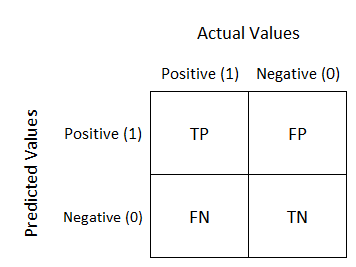

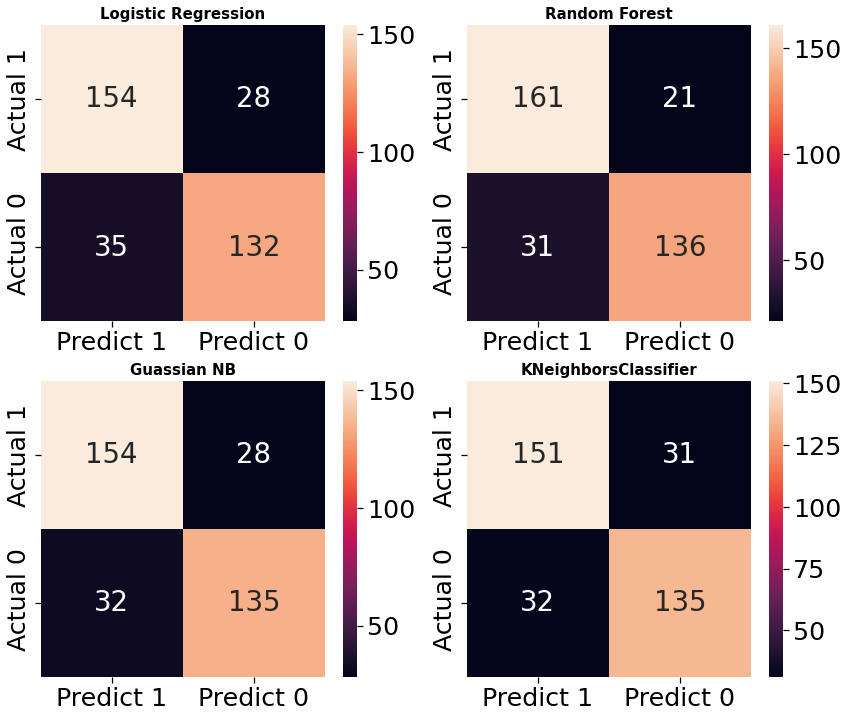

In [79]:
plt.figure(figsize=(14,12))
cm=metrics.confusion_matrix(y_test, y_pred_test1, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])


plt.subplot(221)
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Logistic Regression', fontsize=15, weight='bold')

cm=metrics.confusion_matrix(y_test, y_pred_test2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.subplot(222)
sns.heatmap(df_cm, annot=True,fmt='g' )
plt.title('Random Forest', fontsize=15, weight='bold')

cm=metrics.confusion_matrix(y_test, y_pred_test3, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.subplot(223)
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Guassian NB', fontsize=15, weight='bold')

cm=metrics.confusion_matrix(y_test, y_pred_test4, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]]) 
plt.subplot(224)
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('KNeighborsClassifier', fontsize=15, weight='bold')

plt.show()

In [80]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)

In [81]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [82]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3,  auc_score4)

0.9063301967493584 0.9293939593340791 0.9014608146344674 0.8937948279265645


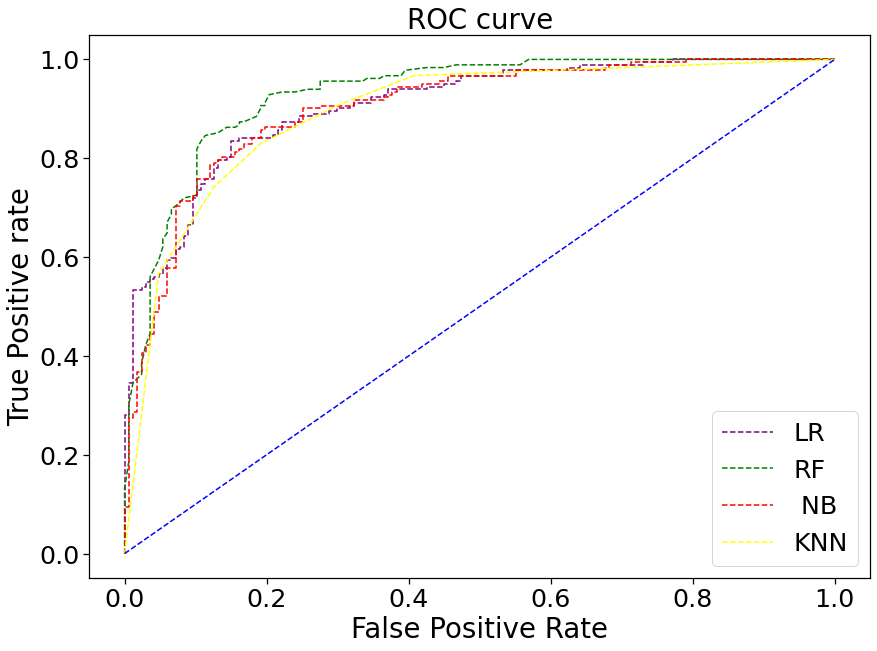

In [83]:
# plot roc curves
plt.figure(figsize=(14, 10))
plt.plot(fpr1, tpr1, linestyle='--',color='purple', label='LR')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RF')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=' NB')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Conclusion